# Style-Emotion Analysis

How do reported emotions and artistic styles correlate in the different
datasets available?

List of datasets considered:

- A) MART
- B) ~~ArtPedia~~
- C) WikiArt Emotions
- D) Artemis

In [1]:
import pathlib
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

ROOT = pathlib.Path.cwd().parent
ROOT

PosixPath('/Users/ricardokleinlein/Desktop/Thesis/EmotionalArt')

## A) MART

When loading the data, since it is formatted in Excel-like shape, we miss
information regarding the specific artwork each annotation is referred to,
keeping only the first row as column name.

This is not important in this very case, where we exclusively seek to draw
the shape of the distribution of emotional scores.

In [55]:
data_path = ROOT / 'MART' / 'MART_DATA.ods'
mart = pandas.read_excel(data_path, engine='odf', sheet_name='ALL_DATA')
score_cols = set(list(mart)) - {'AGE', 'GENDER', 'MUSEUMS/YEAR', 'SUBJECT',
                                'media', 'varianza'}
emotion = mart.dropna()[list(score_cols)].values.ravel()
print(mart)

     MUSEUMS/YEAR GENDER   AGE SUBJECT ppt1_001 ppt1_002 ppt1_003 ppt1_004  \
0             2.5      f  60.0      a1        4        5        4        6   
1            15.0      f  58.0     a12        3        3        4        4   
2            20.0      f  34.0     a16        2        5        5        5   
3             3.0      m  25.0     a21        2        2        4        5   
4             1.0      f  55.0     a23        3        4        4        3   
..            ...    ...   ...     ...      ...      ...      ...      ...   
103          10.0      f  43.0     a77        4        5        6        7   
104          55.0      f  52.0     a82        3        4        4        5   
105           1.0      m  57.0     a87        1        4        4        7   
106           2.0      f  56.0     a92        2        1        3        5   
107           5.5      f  33.0     a97        4        2        3        5   

    ppt1_005 ppt1_006  ... ppt1_093 ppt1_094 ppt1_095 ppt1_096 

### Distribution of raw scores, all dataset

<AxesSubplot:ylabel='Density'>

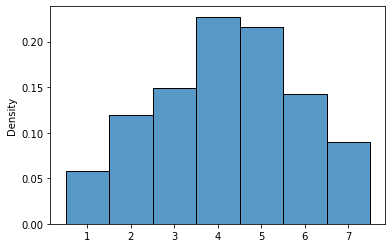

In [83]:
sns.histplot(data=emotion, stat='density', bins=7, discrete=True)

### Distribution of average scores, per picture

<AxesSubplot:xlabel='media', ylabel='Density'>

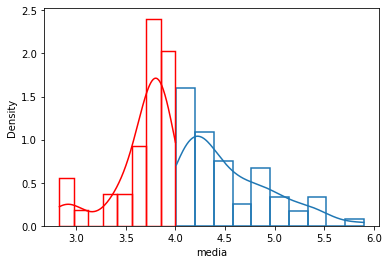

In [79]:
positive = mart[mart['media'] > 4]['media']
negative = mart[mart['media'] <= 4]['media']
sns.histplot(data=positive, stat='density', bins=10, kde=True, fill=False)
sns.histplot(data=negative, stat='density', bins=8, kde=True, color='r',
             fill=False)

## B) WikiArt-Emotions

In [84]:
data_path = ROOT / 'WikiArt-Emotions' / 'WikiArt-annotations.csv'
wikiart = pandas.read_csv(data_path)
wikiart

,Worker ID,ImageOnly #1: ID,ImageOnly #1: Emotions,ImageOnly #1: Other Emotions,ImageOnly #2: ID,ImageOnly #2: Emotions,ImageOnly #2: Other Emotions,ImageOnly #3: ID,ImageOnly #3: Emotions,ImageOnly #3: Other Emotions,...,Art (image+title) #4: Other Emotions,Art (image+title) #4: Is painting,Art (image+title) #4: Face/body,Art (image+title) #4: Art rating,Art (image+title) #5: ID,Art (image+title) #5: Emotions,Art (image+title) #5: Other Emotions,Art (image+title) #5: Is painting,Art (image+title) #5: Face/body,Art (image+title) #5: Art rating
0,worker_1,57728030edc2cb3880f07e00,surprise,NaN,57726f0dedc2cb3880b94625,happiness\r\nlove,NaN,577284aeedc2cb3880fe8ca7,anticipation,NaN,...,NaN,yes,face\r\nbody,3,57728703edc2cb3880061039,trust,NaN,yes,none,3
1,worker_2,57728030edc2cb3880f07e00,anticipation,NaN,57726f0dedc2cb3880b94625,trust\r\nlove\r\narrogance\r\nanticipation,NaN,577284aeedc2cb3880fe8ca7,fear\r\nregret\r\nsadness\r\nshame,NaN,...,NaN,yes,face\r\nbody,3,57728703edc2cb3880061039,anger\r\nfear,NaN,yes,none,2
2,worker_3,57728030edc2cb3880f07e00,disgust,NaN,57726f0dedc2cb3880b94625,happiness,NaN,577284aeedc2cb3880fe8ca7,fear\r\ndisagreeableness,NaN,...,NaN,yes,body,1,57728703edc2cb3880061039,disgust,NaN,yes,none,0
3,worker_4,57728030edc2cb3880f07e00,anticipation,NaN,57726f0dedc2cb3880b94625,happiness\r\noptimism,NaN,577284aeedc2cb3880fe8ca7,sadness,NaN,...,NaN,yes,face\r\nbody,3,57728703edc2cb3880061039,surprise,NaN,yes,none,2
4,worker_5,57728030edc2cb3880f07e00,anticipation\r\nsurprise,NaN,57726f0dedc2cb3880b94625,happiness\r\nlove,NaN,577284aeedc2cb3880fe8ca7,anger\r\nsadness,NaN,...,NaN,yes,face\r\nbody,3,57728703edc2cb3880061039,love\r\nanger,NaN,yes,none,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12680,worker_37,577283c4edc2cb3880fbce85,surprise,NaN,57727c95edc2cb3880e4d1d4,trust\r\nhumility,NaN,577286deedc2cb3880058258,happiness,NaN,...,NaN,yes,none,-2,577286deedc2cb3880058258,happiness\r\nanticipation,NaN,yes,none,2
12681,worker_101,577283c4edc2cb3880fbce85,fear\r\nsurprise,NaN,57727c95edc2cb3880e4d1d4,trust\r\ngratitude\r\nlove,NaN,577286deedc2cb3880058258,shame,NaN,...,NaN,yes,none,-1,577286deedc2cb3880058258,shame,NaN,yes,none,0
12682,worker_15,577283c4edc2cb3880fbce85,anticipation\r\nsurprise,NaN,57727c95edc2cb3880e4d1d4,trust\r\nhumility\r\nhappiness\r\nlove,NaN,577286deedc2cb3880058258,anticipation\r\nsurprise,NaN,...,NaN,yes,face\r\nbody,0,577286deedc2cb3880058258,anticipation\r\nsurprise,NaN,yes,none,0
12683,worker_79,577283c4edc2cb3880fbce85,happiness\r\nanticipation\r\nsurprise,NaN,57727c95edc2cb3880e4d1d4,gratitude\r\nhumility\r\nhappiness\r\nagreeabl...,NaN,577286deedc2cb3880058258,anticipation\r\nsurprise,NaN,...,NaN,yes,none,1,577286deedc2cb3880058258,other,n,yes,none,0


## C) Artemis

In [2]:
artemis = pandas.read_csv(ROOT / "artemis" / "artemis_dataset_release_v0.csv")
artemis

,art_style,painting,emotion,utterance,repetition
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"She seems very happy in the picture, and you w...",10
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,sadness,This woman has really knotty hands which makes...,10
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"When looking at this woman, I am filled with c...",10
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,contentment,"A woman looking at ease, peaceful, and satisfi...",10
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,awe,She looks like a lady from that past that migh...,10
...,...,...,...,...,...
454679,Cubism,gino-severini_a-dancer-1,awe,the collection and collage of different colors...,48
454680,Romanticism,ivan-aivazovsky_sea-at-night-1861,awe,The peaceful reflections of the moonlight on t...,8
454681,Romanticism,ivan-aivazovsky_sea-at-night-1861,excitement,I can imagine the sailors resting this peacefu...,8
454682,Romanticism,ivan-aivazovsky_sea-at-night-1861,contentment,The steep mountains and the moonlight provide ...,8


### Global distribution of Emotions

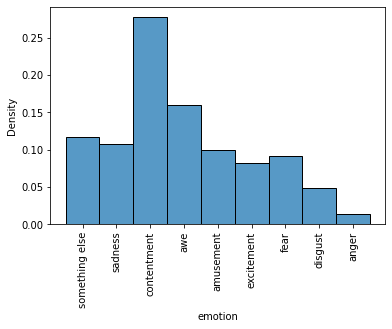

In [6]:
sns.histplot(data=artemis['emotion'], discrete=True, stat='density')
plt.xticks(rotation=90)
plt.show()

### Global distribution of Artistic Styles

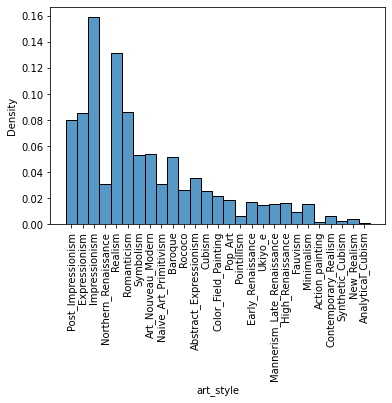

In [7]:
sns.histplot(data=artemis['art_style'], discrete=True, stat='density')
plt.xticks(rotation=90)
plt.show()

### Ablation analysis of relationship Art Style - Emotions

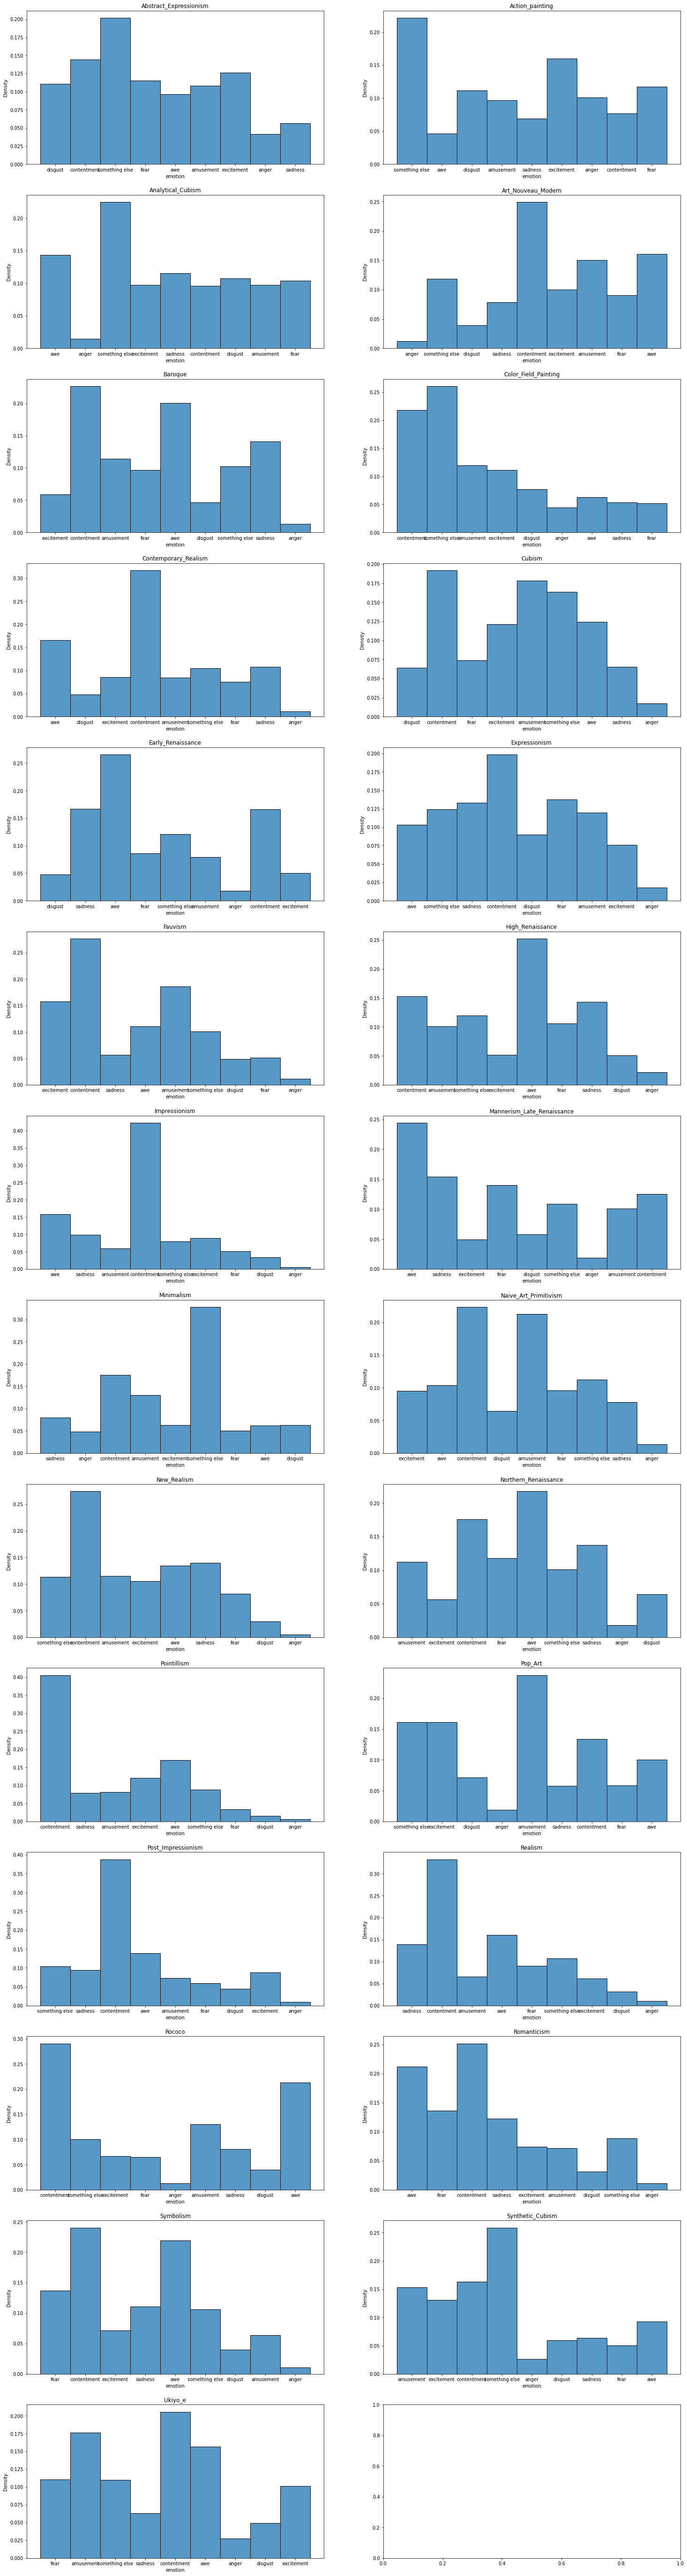

In [49]:
styles = sorted(list(artemis['art_style'].unique()))
fig, axs = plt.subplots(14, 2, figsize=(25, 100))
row = -1
for s, style in enumerate(styles):
    artemis_style = artemis[artemis['art_style'] == style]
    col = 0 if s % 2 == 0 else 1
    row = row if s % 2 != 0 else row + 1
    sns.histplot(artemis_style,
                 x='emotion',
                 discrete=True,
                 stat='density',
                 ax=axs[row, col])
    axs[(row, col)].set_title(style)
plt.show()
